<h1>Yoda Retirer Dashboard</h1>

<p>Risk-averse investors can structure portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment, hypoteshis put forth by Harry Markowitz in "Portfolio Selection"(published in 1952 by the Journal of Finance).</p>


In [40]:
# initial imports
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import hvplot.pandas
import panel as pn
import plotly.express as px
import seaborn as sns

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

# Import Data

In [ ]:
# Import the CSVs to Pandas DataFrames

#we need all relevant files for 5 portfolios

file_path = Path("")
df = pd.read_csv(file_path, index_col="year")

file_path = Path("")
df2 = pd.read_csv(file_path)

In [39]:
#use interactive widgets for insert user data, which should be presented on the welcome tab, 
#and add click buton to call the functions for all portfolio.
#to make it easier

from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider
from ipywidgets import widgets
import yoda_simulator as ys
from IPython.display import display


#this widgets should be put in function at the end, 

slider = widgets.IntSlider(value= 5, min=5, max=30)
years_until_retirement = slider.value

dropdown = widgets.Dropdown(options=['Yoda 1 - Equally Weighted Equity Portfolio',
                           'Yoda 2 - Fixed income Optimized Portfolio Yoda',
                           'Yoda 3 - Fixed income Equally Weighted',
                           'Yoda 4 - Blended - Will the real Yoda please stand up!', 
                           'Yoda 5 - Maximized Profit Adjusting Returns '])
portfolio_choice = dropdown.value

investment = widgets.FloatText()
initial_investment = investment.value

withdrawal_pct = widgets.FloatText()
annual_withdrawal_pct = withdrawal_pct.value

withdrawal_amount = widgets.FloatText()
annual_withdrawal_ammount = withdrawal_amount.value

button = widgets.Button(description="Calculate!")
output = widgets.Output()

#here we are gonna need a function to get the output correctly. CHALLENGE!!!
def on_button_clicked(b):
    with output:
        print("Button clicked.")
        
        
button.on_click(on_button_clicked)

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='Years Until Retirement'), slider], layout=form_item_layout),
    Box([Label(value='Yoda Portfolio Choice'),dropdown], layout=form_item_layout),
    Box([Label(value='Initial Investment'), investment], layout=form_item_layout),
    
    Box([Label(value='% of Annual Withdrawal'), withdrawal_pct], layout=form_item_layout),
    
    Box([Label(value='Annual Withdrawal Amount'), withdrawal_amount], layout=form_item_layout),
    
    Box([Label(value='Additional Information'), widgets.Textarea()], layout=form_item_layout),
    Box([Label(value='YODA Calculator'), button], layout=form_item_layout)
    
]

widgets.interact_manual()

insert_param = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
insert_param


Box(children=(Box(children=(Label(value='Years Until Retirement'), IntSlider(value=5, max=30, min=5)), layout=…

- - -

<h1>All Optimal Portfolios (Efficient Frontier)</h1>

<p>In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. </p>

<p>These functions will convert the plot object to a Panel pane.</p>

<p>Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.</p>

<p>Return a Panel pane object from each function that can be used to build the dashboard.</p>

<p>Note: Remove any <code>.show()</code> lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.</p>


<module 'matplotlib.pyplot' from 'C:\\Users\\Vasic\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

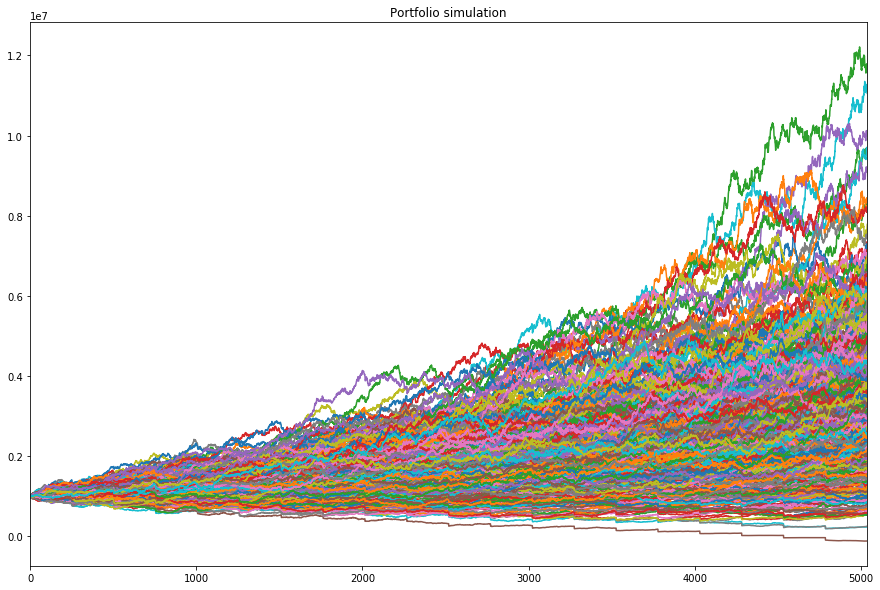

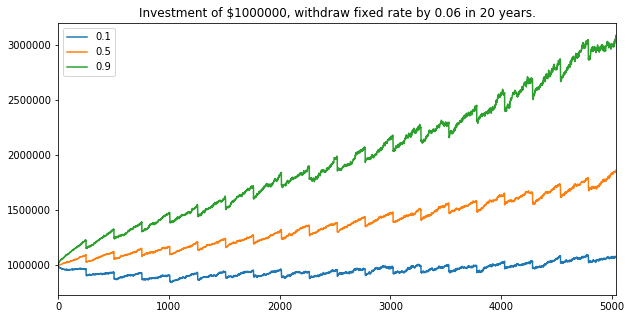

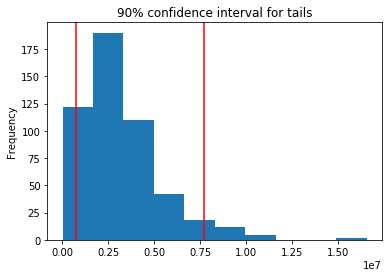

In [41]:

#guys, as Junwei already made simulator idea is to call all the functions from external py files.....this is just a frame 
#we should fill in and get a panel dashboard. 
#Welcome tab should have message on the left side and insert table on the right(from interactive widgets)
#each portfolio should be presented as separate tab
#last tab should be saving planner where we should call the function for search withdraw amount and rate
# challenge.....at the end we should try to export all the results on html page by bokeh but we'll see.....

#still messy but lets make it clear what we want to show....we have cleaned data and a simulator with lot of functions
#get portfolio 1
#TEST WITH ONE PORTFOLIO..
iex_df = pd.read_pickle("./iex3years")
iex_df.drop(columns=['volume'], level=1, inplace=True)
iex_df.columns = iex_df.columns.droplevel(1)
iex_df.sort_index(ascending = True, inplace = True)

# Calculate the daily roi for the stocks
daily_return = iex_df.pct_change().dropna()

cal_avg = pd.DataFrame(daily_return.mean()).rename(columns = ({0:'avg'}))
cal_std = pd.DataFrame(daily_return.std()).rename(columns = ({0:'std'}))
Yoda1_Equally_Weighted_Equity_Portfolio = pd.concat((cal_avg, cal_std), axis = 1).T
Yoda1_Equally_Weighted_Equity_Portfolio.loc['weight','SPY'] = 0.7
Yoda1_Equally_Weighted_Equity_Portfolio.loc['weight','AGG'] = 0.3
Yoda1_Equally_Weighted_Equity_Portfolio.loc[:,'XYZ'] =[0.000002,0.03,0]
Yoda1_Equally_Weighted_Equity_Portfolio



# Yoda 1 - Equally WEighted Equity Portfolio

# Define Panel Visualization Functions
#def equ_weighted_efficient_frontier():
"""Yoda 1 - Equally WEighted Equity Portfolio"""
# we need a function for efficient frontier 

#def monte_carlo_ptf1():#functions will be imported from separate file
"""Monte Carlo Equally Weighted Equity Portfolio"""
ys.simulation_chart(Yoda1_Equally_Weighted_Equity_Portfolio, 1_000_000,'fixed amount', 60_000,20)
#def porftoflio_structure():
"""Equally Weighted Portfolio Structure."""
    #ys.
    #make a chart for structure of the portfolio
#def guantile_chart():
"""."""
ys.quantile_chart(Yoda1_Equally_Weighted_Equity_Portfolio, 1_000_000,'fixed rate', 0.06,20)
#def confidence_interval()
ys.confidence_interval(Yoda1_Equally_Weighted_Equity_Portfolio, 1_000_000,'fixed amount', 60_000,20)

<module 'matplotlib.pyplot' from 'C:\\Users\\Vasic\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

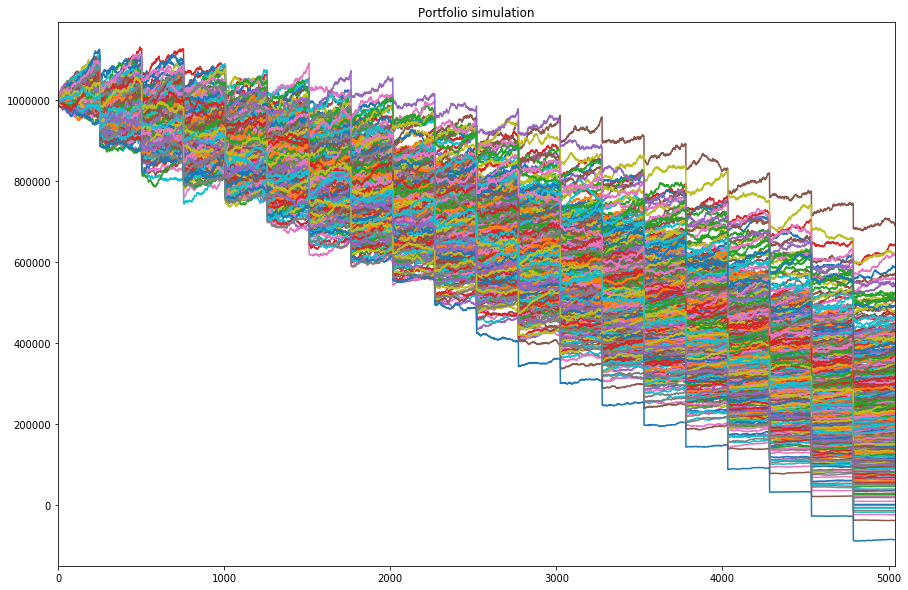

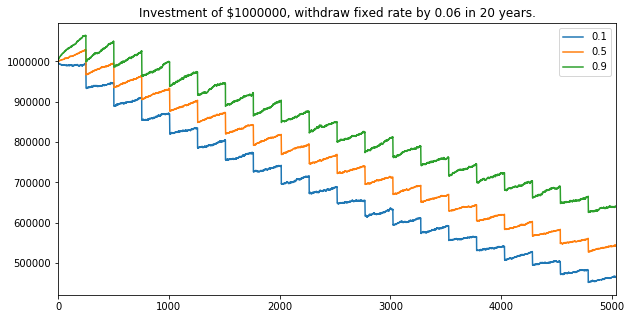

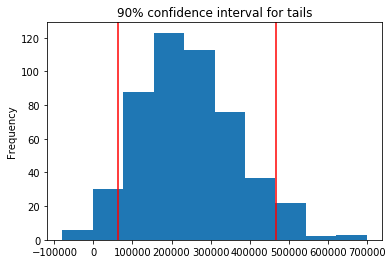

In [43]:
# Yoda 2 - Fixed income Optimized Portfolio Yoda'
#THIS IS FAKE DATA.....

Yoda2_Fixed_income_Optimized_Portfolio_Yoda = pd.DataFrame([[0.0002,0.000009,0.0002,0.00008],
                           [0.00003,0.0083,0.0005,0.000865],
                           [0.1,0.2,0.3,0.4]])

# Define Panel Visualization Functions
#def equ_weighted_efficient_frontier():
"""Yoda 2 - Fixed income Optimized Portfolio Yoda"""
  # we need a function for efficient frontier  
    
#def monte_carlo_ptf1():
"""Monte Carlo Fixed income Optimized Portfolio"""
ys.simulation_chart(Yoda2_Fixed_income_Optimized_Portfolio_Yoda, 1_000_000,'fixed amount', 60_000,20)
#def porftoflio_structure():
"""Fixed income Optimized Portfolio Structure."""
    #ys.
    #make a chart for structure of the portfolio
#def guantile_chart():
"""."""
ys.quantile_chart(Yoda2_Fixed_income_Optimized_Portfolio_Yoda, 1_000_000,'fixed rate', 0.06,20)
#def confidence_interval()
ys.confidence_interval(Yoda2_Fixed_income_Optimized_Portfolio_Yoda, 1_000_000,'fixed amount', 60_000,20)

In [ ]:
#Yoda 3 - Fixed income Equally Weighted
# Define Panel Visualization Functions
def equ_weighted_efficient_frontier():
    """Yoda 1 - Equally WEighted Equity Portfolio"""
    
    
    plt.figure(figsize=(12,8))
    plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
    plt.colorbar(label='Sharpe Ratio')
    plt.xlabel('Volatility')
    plt.ylabel('Return')

def monte_carlo_ptf1():
    """Monte Carlo Equally Weighted Equity Portfolio"""
#ys.simulation_chart(portfolio1, 1_000_000,'fixed amount', 60_000,20)
def porftoflio_structure():
    """Equally Weighted Portfolio Structure."""
    #ys.
    #make a chart for structure of the portfolio
def guantile_chart():
    """."""
 #ys.quantile_chart(portfolio1, 1_000_000,'fixed rate', 0.06,20)
def confidence_interval()
#ys.confidence_interval(portfolio1, 1_000_000,'fixed amount', 60_000,20)

In [ ]:
#Yoda 4 - Blended - Will the real Yoda please stand up!
# Define Panel Visualization Functions
def equ_weighted_efficient_frontier():
    """Yoda 1 - Equally WEighted Equity Portfolio"""
# we need a function for efficient frontier 

def monte_carlo_ptf1():
    """Monte Carlo Equally Weighted Equity Portfolio"""
#ys.simulation_chart(portfolio1, 1_000_000,'fixed amount', 60_000,20)
def porftoflio_structure():
    """Equally Weighted Portfolio Structure."""
    #ys.
    #make a chart for structure of the portfolio
def guantile_chart():
    """."""
 #ys.quantile_chart(portfolio1, 1_000_000,'fixed rate', 0.06,20)
def confidence_interval()
#ys.confidence_interval(portfolio1, 1_000_000,'fixed amount', 60_000,20)

In [ ]:
#Yoda 5 - Maximized Profit Adjusting Returns
# Define Panel Visualization Functions
def equ_weighted_efficient_frontier():
    """Yoda 1 - Equally WEighted Equity Portfolio"""
    
    # we need a function for efficient frontier 

def monte_carlo_ptf1():
    """Monte Carlo Equally Weighted Equity Portfolio"""
#ys.simulation_chart(portfolio1, 1_000_000,'fixed amount', 60_000,20)
def porftoflio_structure():
    """Equally Weighted Portfolio Structure."""
    #ys.
    #make a chart for structure of the portfolio
def guantile_chart():
    """."""
 #ys.quantile_chart(portfolio1, 1_000_000,'fixed rate', 0.06,20)
def confidence_interval()
#ys.confidence_interval(portfolio1, 1_000_000,'fixed amount', 60_000,20)

In [ ]:
#saving planner
#run functions
#ys.search_withdraw_amount()
#ys.search_withdraw_rate ()



## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [ ]:
# Create a Title for the Dashboard
title = pn.pane.Markdown(
    """
# Yoda Retirer - retirement simulation tool,,,,,,
""",
    width=800,
)

welcome = pn.pane.Markdown(
    """
This dashboard presents a visual analysis of retirement simulation based on user risk preferences.
"""
)

# Create a tab layout for the dashboard
tabs = pn.Tabs(
    ("Welcome", pn.Row(welcome,insert_function()),
    ("Yoda 1 - Equally Weighted Equity Portfolio", pn.Column(equ_weighted_efficient_frontier(), monte_carlo_ptf1(), 
                                                             guantile_chart(), confidence_interval(),porftoflio_structure())),
    
    
    ("Yoda 2 - Fixed income Optimized Portfolio Yoda", pn.Column(equ_weighted_efficient_frontier(), monte_carlo_ptf1(), 
                                                             guantile_chart(), confidence_interval(),porftoflio_structure())),
    
    ("Yoda 3 - Fixed income Equally Weighted", pn.Column(equ_weighted_efficient_frontier(), monte_carlo_ptf1(), 
                                                             guantile_chart(), confidence_interval(),porftoflio_structure())),
    
    
    ("Yoda 4 - Blended - Will the real Yoda please stand up!", pn.Column(equ_weighted_efficient_frontier(), monte_carlo_ptf1(), 
                                                             guantile_chart(), confidence_interval(),porftoflio_structure())),
    
    ("Yoda 5 - Maximized Profit Adjusting Returns", pn.Column(equ_weighted_efficient_frontier(), monte_carlo_ptf1(), 
                                                             guantile_chart(), confidence_interval(),porftoflio_structure())),
    
    
    ("Saving Planner", pn.Row(parallel_coordinates(), parallel_categories(), width=960),),
)

panel = pn.Column(pn.Row(title), tabs, width=900)

## Serve the Panel Dashboard

In [ ]:
panel.servable()